In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv('realestate1.csv')

print(df.head())

   status  bed  bath  acre_lot              city  state  zip_code  house_size  \
0       0  1.0     1     20.20         Wilbraham      0      1095        1751   
1       1  1.0     2      0.28            Agawam      0      1030        1060   
2       0  4.0     2      0.16       Springfield      0      1105        1402   
3       0  5.0     1      0.13           Holyoke      0      1040        1327   
4       0  3.0     1      0.13  West Springfield      0      1089        1715   

    price  
0  299000  
1  300000  
2  199900  
3  300000  
4  299000  


In [8]:
import pandas as pd

median_bath = df['bed'].median()

df['bed'].fillna(median_bath, inplace=True)


# Verify that null values have been filled
print(df['bed'])


0       1.0
1       1.0
2       4.0
3       5.0
4       3.0
       ... 
8041    2.0
8042    4.0
8043    5.0
8044    2.0
8045    1.0
Name: bed, Length: 8046, dtype: float64


C:\Users\imjha\AppData\Local\Temp\ipykernel_9692\408418487.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bed'].fillna(median_bath, inplace=True)


In [9]:
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64
Missing values distribution: 
status        0.0
bed           0.0
bath          0.0
acre_lot      0.0
city          0.0
state         0.0
zip_code      0.0
house_size    0.0
price         0.0
dtype: float64


In [10]:
new_df = df

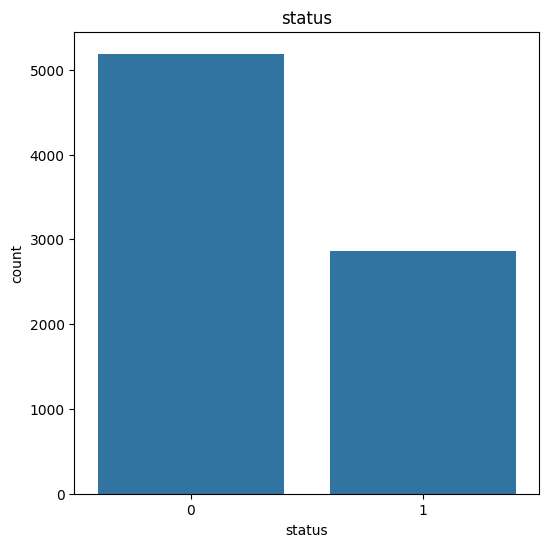

In [11]:
new_df.status.value_counts()
plt.figure(figsize=(6,6)) 
sns.countplot(x = "status", data = new_df)
plt.title('status') 
plt.show()

status
0    5189
1    5189
Name: count, dtype: int64


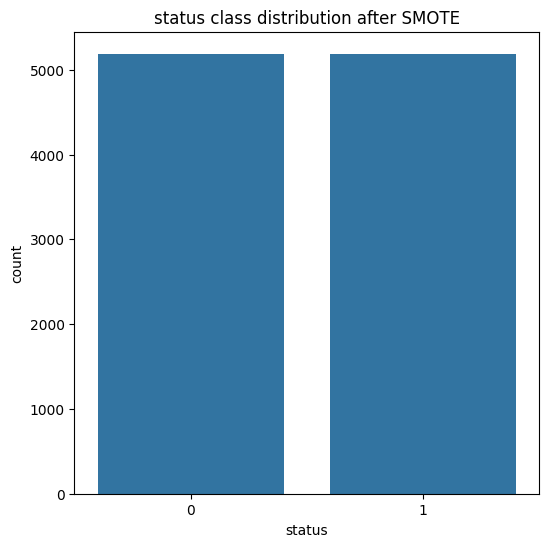

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns

X = new_df.drop(columns=['status'])
y = new_df['status']
X_encoded = pd.get_dummies(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

print(pd.Series(y_resampled).value_counts())

plt.figure(figsize=(6,6))
sns.countplot(x=y_resampled)
plt.title('status class distribution after SMOTE')
plt.show()
